# Dataset Analysis

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Creating a Full Dataset

In [2]:
column_names = [
    "timestamp",
    "activity_id", 
    "heart_rate",
    "IMU_hand_temperature",
    "IMU_hand_3D_acceleration_data_16g_1",
    "IMU_hand_3D_acceleration_data_16g_2",
    "IMU_hand_3D_acceleration_data_16g_3",
    "IMU_hand_3D_acceleration_data_6g_1",
    "IMU_hand_3D_acceleration_data_6g_2",
    "IMU_hand_3D_acceleration_data_6g_3",
    "IMU_hand_3D_gyroscope_data_1",
    "IMU_hand_3D_gyroscope_data_2",
    "IMU_hand_3D_gyroscope_data_3",
    "IMU_hand_3D_magnetometer_data_1",
    "IMU_hand_3D_magnetometer_data_2",
    "IMU_hand_3D_magnetometer_data_3",
    "IMU_hand_orientation_1",
    "IMU_hand_orientation_2",
    "IMU_hand_orientation_3",
    "IMU_hand_orientation_4",
    "IMU_chest_temperature",
    "IMU_chest_3D_acceleration_data_16g_1",
    "IMU_chest_3D_acceleration_data_16g_2",
    "IMU_chest_3D_acceleration_data_16g_3",
    "IMU_chest_3D_acceleration_data_6g_1",
    "IMU_chest_3D_acceleration_data_6g_2",
    "IMU_chest_3D_acceleration_data_6g_3",
    "IMU_chest_3D_gyroscope_data_1",
    "IMU_chest_3D_gyroscope_data_2",
    "IMU_chest_3D_gyroscope_data_3",
    "IMU_chest_3D_magnetometer_data_1",
    "IMU_chest_3D_magnetometer_data_2",
    "IMU_chest_3D_magnetometer_data_3",
    "IMU_chest_orientation_1",
    "IMU_chest_orientation_2",
    "IMU_chest_orientation_3",
    "IMU_chest_orientation_4",
    "IMU_ankle_temperature",
    "IMU_ankle_3D_acceleration_data_16g_1",
    "IMU_ankle_3D_acceleration_data_16g_2",
    "IMU_ankle_3D_acceleration_data_16g_3",
    "IMU_ankle_3D_acceleration_data_6g_1",
    "IMU_ankle_3D_acceleration_data_6g_2",
    "IMU_ankle_3D_acceleration_data_6g_3",
    "IMU_ankle_3D_gyroscope_data_1",
    "IMU_ankle_3D_gyroscope_data_2",
    "IMU_ankle_3D_gyroscope_data_3",
    "IMU_ankle_3D_magnetometer_data_1",
    "IMU_ankle_3D_magnetometer_data_2",
    "IMU_ankle_3D_magnetometer_data_3",
    "IMU_ankle_orientation_1",
    "IMU_ankle_orientation_2",
    "IMU_ankle_orientation_3",
    "IMU_ankle_orientation_4"
]

col_for_drop = [col for col in column_names if col.endswith(tuple(f"orientation_{i}" for i in range(1, 5)))]
col_for_drop += [col for col in column_names if col.endswith(tuple(f"acceleration_data_6g_{i}" for i in range(1, 4)))]

In [3]:
person1 = pd.read_csv("Protocol/subject101.dat", delimiter=" ", names=column_names, header=None)
person2 = pd.read_csv("Protocol/subject102.dat", delimiter=" ", names=column_names, header=None)
person3 = pd.read_csv("Protocol/subject103.dat", delimiter=" ", names=column_names, header=None)
person4 = pd.read_csv("Protocol/subject104.dat", delimiter=" ", names=column_names, header=None)
person5 = pd.read_csv("Protocol/subject105.dat", delimiter=" ", names=column_names, header=None)
person6 = pd.read_csv("Protocol/subject106.dat", delimiter=" ", names=column_names, header=None)
person7 = pd.read_csv("Protocol/subject107.dat", delimiter=" ", names=column_names, header=None)
person8 = pd.read_csv("Protocol/subject108.dat", delimiter=" ", names=column_names, header=None)
person9 = pd.read_csv("Protocol/subject109.dat", delimiter=" ", names=column_names, header=None)

person1_additional = pd.read_csv("Optional/subject101.dat", delimiter=" ", names=column_names, header=None)
person5_additional = pd.read_csv("Optional/subject105.dat", delimiter=" ", names=column_names, header=None)
person6_additional = pd.read_csv("Optional/subject106.dat", delimiter=" ", names=column_names, header=None)
person8_additional = pd.read_csv("Optional/subject108.dat", delimiter=" ", names=column_names, header=None)
person9_additional = pd.read_csv("Optional/subject109.dat", delimiter=" ", names=column_names, header=None)

## Data Preprocessing

***
### Заполнение пульса:
***

In [4]:
df_list = [person1, person2, person3, person4, person5, person6, person7, person8, person9, 
           person1_additional, person5_additional, person6_additional, person8_additional, person9_additional]

for df in df_list:
    hr_positions = np.flatnonzero(df['heart_rate'].notna())
    if len(hr_positions) < 2:
        continue
    first_idx, second_idx = hr_positions[0], hr_positions[1]
    hr_1 = df['heart_rate'].iat[first_idx]
    hr_2 = df['heart_rate'].iat[second_idx]
    for pos in hr_positions[2:]:
        fill_val = (hr_1 + hr_2) / 2
        df.loc[first_idx + 1 : second_idx, 'heart_rate'] = (
            df.loc[first_idx + 1 : second_idx, 'heart_rate'].fillna(fill_val)
        )
        first_idx, second_idx = second_idx, pos
        hr_1, hr_2 = hr_2, df['heart_rate'].iat[pos]
    df.loc[second_idx + 1 :, 'heart_rate'] = (
        df.loc[second_idx + 1 :, 'heart_rate'].fillna(hr_2)
    )

## Dataset Splitting with Temporal Consistency

***
### Создание df_all с учетом деления на людей и временной согласованности:
***

In [5]:
all_classes = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 24]

subjects = {
    1: [person1, person1_additional],
    2: [person2],
    3: [person3],
    4: [person4],
    5: [person5, person5_additional],
    6: [person6, person6_additional],
    7: [person7],
    8: [person8, person8_additional],
    9: [person9, person9_additional]
}

df_all = pd.DataFrame()
for subject_id, dfs in subjects.items():
    df_subject = pd.concat(dfs, axis=0, ignore_index=True)
    df_subject['subject_id'] = subject_id
    df_all = pd.concat([df_all, df_subject], axis=0, ignore_index=True)

df_all = df_all.drop(columns=col_for_drop)
df_all = df_all.dropna()
df_all = df_all[df_all["activity_id"] != 0]

# Проверка активностей:
unique_activities = sorted(df_all['activity_id'].unique())
print(f"Unique activities in combined dataset: {unique_activities}")
if set(unique_activities) == set(all_classes):
    print("All required classes are present in the combined dataset.")
else:
    print(f"Warning: Missing classes {set(all_classes) - set(unique_activities)}")

Unique activities in combined dataset: [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 24]
All required classes are present in the combined dataset.


***
### Мини-EDA для датасета:
***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

print("Размер датасета:", df_all.shape)
print("\nПервые 5 строк:")
print(df_all.head())
print("\nТипы данных:")
print(df_all.dtypes)

numeric_cols = df_all.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('activity_id')
numeric_cols.remove('subject_id')
categorical_cols = ['activity_id', 'subject_id']
print("\nЧисловые признаки:", numeric_cols)
print("Категориальные признаки:", categorical_cols)

In [ ]:
# Матрица корреляций для числовых признако
plt.figure(figsize=(12, 8))
corr_matrix = df_all[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

corr_pairs = corr_matrix.unstack()
high_corr = corr_pairs[(abs(corr_pairs) > 0.7) & (abs(corr_pairs) < 1)].sort_values(ascending=False)
print("\nВысокие корреляции (|corr| > 0.7):")
print(high_corr)

In [ ]:
# Распределение activity_id
plt.figure(figsize=(10, 6))
sns.countplot(x='activity_id', data=df_all, order=sorted(df_all['activity_id'].unique()))
plt.title('Distribution of Activity Classes')
plt.xlabel('Activity ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Распределение activity_id по субъектам
plt.figure(figsize=(12, 6))
sns.countplot(x='activity_id', hue='subject_id', data=df_all, order=sorted(df_all['activity_id'].unique()))
plt.title('Activity Distribution by Subject')
plt.xlabel('Activity ID')
plt.ylabel('Count')
plt.legend(title='Subject ID')
plt.xticks(rotation=45)
plt.show()

# Доля классов
class_counts = df_all['activity_id'].value_counts(normalize=True)
print("\nДоля каждого класса activity_id:")
print(class_counts)

In [ ]:
accel_cols = [col for col in numeric_cols if 'accel' in col and 'hand' in col]
print("Выбранные признаки для анализа динамики:", accel_cols)

subject_1 = df_all[df_all['subject_id'] == 1].copy()
subject_1['time'] = subject_1.index

plt.figure(figsize=(14, 6))
for col in accel_cols:
    sns.lineplot(x='time', y=col, hue='activity_id', data=subject_1, alpha=0.5)
plt.title('Temporal Dynamics of Hand Accelerometer Features (Subject 1)')
plt.xlabel('Time Index')
plt.ylabel('Acceleration')
plt.legend(title='Activity ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Boxplot для топ-признаков
plt.figure(figsize=(14, 6))
for i, col in enumerate(top_numeric_cols[:3], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='activity_id', y=col, data=df_all)
    plt.title(f'Boxplot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Violin Plot
plt.figure(figsize=(14, 6))
for i, col in enumerate(top_numeric_cols[:3], 1):
    plt.subplot(1, 3, i)
    sns.violinplot(x='activity_id', y=col, data=df_all)
    plt.title(f'Violin Plot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

# Мозаичный плот для activity_id и subject_i
plt.figure(figsize=(10, 6))
mosaic(df_all, ['activity_id', 'subject_id'], title='Mosaic Plot of Activity ID vs Subject ID')
plt.show()

In [ ]:
# Проверка аномалий (например, экстремальные значения)
from scipy.stats import zscore
z_scores = df_all[numeric_cols].apply(zscore)
outliers = (z_scores.abs() > 3).sum()
print("\nКоличество выбросов (|z-score| > 3) по признакам:")
print(outliers[outliers > 0])

***
### Разделение на трейн и тест с учетом времени (классы активности, которые не попали - потом добавляются по маске и заново сортируются по людям и времени для сохранения порядка):
***

In [10]:
import pandas as pd

# -------------------------------
# 1. Проверка и подготовка данных
# -------------------------------

# Предполагается, что df_all уже загружён и содержит колонки:
# 'subject_id', 'timestamp', 'activity_id'
required_cols = {'subject_id', 'timestamp', 'activity_id'}
if not required_cols.issubset(df_all.columns):
    missing = required_cols - set(df_all.columns)
    raise ValueError(f"В df_all отсутствуют обязательные колонки: {missing}")

# Приводим timestamp к datetime, если он ещё не в нужном формате
if not pd.api.types.is_datetime64_any_dtype(df_all['timestamp']):
    df_all['timestamp'] = pd.to_datetime(df_all['timestamp'], errors='raise')

# -------------------------------
# 2. Сортировка
# -------------------------------

# Сортируем сначала по subject_id, затем по времени
df_all = df_all.sort_values(['subject_id', 'timestamp']).reset_index(drop=True)

# -------------------------------
# 3. Блоковое разбиение
# -------------------------------

# train_parts и test_parts будут списками фрагментов DataFrame
train_parts = []
test_parts  = []

# Пробегаем по каждому subject
for subject_id, df_subj in df_all.groupby('subject_id', sort=False):
    # Берём подряд идущие блоки одной и той же активности
    # Сначала сбросим индекс внутри df_subj, чтобы удобнее было работать по позициям
    df_subj = df_subj.reset_index(drop=True)
    n_subj = len(df_subj)
    start_idx = 0

    while start_idx < n_subj:
        # Найдём конец текущего блока: все следующие строки с таким же activity_id
        current_activity = df_subj.loc[start_idx, 'activity_id']
        end_idx = start_idx + 1
        while end_idx < n_subj and df_subj.loc[end_idx, 'activity_id'] == current_activity:
            end_idx += 1

        # Блок от start_idx до end_idx-1 (включительно) имеет одинаковую activity_id
        block = df_subj.iloc[start_idx:end_idx]
        block_len = end_idx - start_idx

        # Разбиваем блок 80% / 20%
        k = int(block_len * 0.8)
        # Гарантируем, что первая часть хотя бы 1 строку (если block_len >= 2)
        # и что последняя часть хотя бы 1 строку (если block_len >= 2).
        if block_len >= 2:
            k = max(1, min(block_len - 1, k))
        else:
            # Если block_len == 1, тогда k = 0 → вся строка уйдёт в test
            k = 0

        if k > 0:
            train_parts.append(block.iloc[:k])
        test_parts.append(block.iloc[k:])

        # Переходим к следующему блоку
        start_idx = end_idx

# Собираем промежуточные train_df и test_df
train_df = pd.concat(train_parts, ignore_index=True)
test_df  = pd.concat(test_parts,  ignore_index=True)

# -------------------------------
# 4. Проверка полноты использования строк
# -------------------------------

used_in_train = set(train_df.index)
used_in_test  = set(test_df.index)
# Но после concat индексы перекомпонованы, поэтому проще проверить длину:
total_used = len(train_df) + len(test_df)
total_all  = len(df_all)

if total_used != total_all:
    # В теории такого быть не должно, но на всякий случай:
    print(f"⚠️ Внимание: использовано {total_used} строк, а всего в df_all — {total_all}.")
else:
    print(f"✅ Все {total_all} строк из df_all распределены между train и test.")

# -------------------------------
# 5. Проверка покрытия всех классов
# -------------------------------

all_classes       = sorted(df_all['activity_id'].unique())
train_classes     = sorted(train_df['activity_id'].unique())
test_classes      = sorted(test_df['activity_id'].unique())
missing_in_train  = set(all_classes) - set(train_classes)
missing_in_test   = set(all_classes) - set(test_classes)

print(f"\nКлассы, присутствующие в train: {train_classes}")
print(f"Классы, присутствующие в test:  {test_classes}")

if not missing_in_train and not missing_in_test:
    print("✅ Все классы из df_all есть и в train, и в test.")
else:
    if missing_in_train:
        print(f"⚠️ В train не хватает классов: {sorted(missing_in_train)}")
    if missing_in_test:
        print(f"⚠️ В test не хватает классов: {sorted(missing_in_test)}")

# -------------------------------
# 6. Итоговая сортировка и сброс индексов
# -------------------------------

train_df = train_df.sort_values(['subject_id', 'timestamp']).reset_index(drop=True)
test_df  = test_df.sort_values(['subject_id', 'timestamp']).reset_index(drop=True)

print(f"\nИтоги (после финальной сортировки):")
print(f"  Размер train: {len(train_df)}")
print(f"  Размер test:  {len(test_df)}")

# Готово: train_df и test_df содержат все строки, разбитые блоками по activity_id.


✅ Все 2700980 строк из df_all распределены между train и test.

Классы, присутствующие в train: [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 24]
Классы, присутствующие в test:  [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 24]
✅ Все классы из df_all есть и в train, и в test.

Итоги (после финальной сортировки):
  Размер train: 2160346
  Размер test:  540634


## Feature Engineering

In [11]:
for df in [train_df, test_df]:
    df["sum_temperature"] = (
        df["IMU_hand_temperature"] +
        df["IMU_chest_temperature"] +
        df["IMU_ankle_temperature"]
    )
    df["sum_hand_acceleration"] = (
        df["IMU_hand_3D_acceleration_data_16g_1"] +
        df["IMU_hand_3D_acceleration_data_16g_2"] +
        df["IMU_hand_3D_acceleration_data_16g_3"]
    )
    df["sum_chest_acceleration"] = (
        df["IMU_chest_3D_acceleration_data_16g_1"] +
        df["IMU_chest_3D_acceleration_data_16g_2"] +
        df["IMU_chest_3D_acceleration_data_16g_3"]
    )
    df["sum_ankle_acceleration"] = (
        df["IMU_ankle_3D_acceleration_data_16g_1"] +
        df["IMU_ankle_3D_acceleration_data_16g_2"] +
        df["IMU_ankle_3D_acceleration_data_16g_3"]
    )
    df["heart_rate_rolling_mean"] = df["heart_rate"].rolling(window=5, min_periods=1).mean()

## Encoding and Preparation for Modeling

In [12]:
X_train = train_df.drop(columns=["activity_id", "subject_id", "timestamp"])
y_train = train_df["activity_id"]
X_test = test_df.drop(columns=["activity_id", "subject_id", "timestamp"])
y_test = test_df["activity_id"]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

## Sequence Preparation for HMM (пока не нужно)

In [ ]:
import numpy as np

def create_sequences(X, y, window_size=100):
    sequences = []
    labels = []
    X_values = X.values if hasattr(X, 'values') else X
    y_values = np.asarray(y)
    
    for i in range(0, len(X) - window_size + 1, window_size):
        sequences.append(X_values[i:i + window_size])
        labels.append(np.bincount(y_values[i:i + window_size].astype(int)).argmax())
    return np.array(sequences), np.array(labels)

X_train_seq, y_train_seq = create_sequences(X_train, y_train_enc)
X_test_seq, y_test_seq = create_sequences(X_test, y_test_enc)

print(f"Train sequences: {X_train_seq.shape}, Test sequences: {X_test_seq.shape}")

***
### Обучение моделей:
***

***
#### XGBoost:
***

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.utils import resample

# Подвыборка 30% тренировочных данных для ускорения
# X_train_sub, y_train_sub = resample(X_train, y_train, n_samples=int(0.3 * len(X_train)), random_state=42)
X_train_sub, y_train_sub = X_train, y_train

# Кодирование меток
train_classes = np.unique(y_train_sub)
le = LabelEncoder().fit(train_classes)
y_train_enc = le.transform(y_train_sub)

# Фильтрация тестового набора (только классы из тренировочного)
test_mask = np.isin(y_test, train_classes)
X_test_filt = X_test[test_mask]
y_test_filt = y_test[test_mask]

# Пайплайн с масштабированием и моделью
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', XGBClassifier(
        objective='multi:softprob',
        n_estimators=300,
        learning_rate=0.1,
        max_depth=10,
        random_state=42
    ))
])

# Обучение
pipeline.fit(X_train_sub, y_train_enc)

# Предсказания
y_pred_enc = pipeline.predict(X_test_filt)
y_pred = le.inverse_transform(y_pred_enc)

# Оценка
print("XGBoost Classification Report:")
print(classification_report(y_test_filt, y_pred))

XGBoost Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.98      0.99     38470
           2       1.00      0.96      0.98     36952
           3       0.95      0.88      0.91     37840
           4       0.99      0.79      0.88     46005
           5       0.93      0.94      0.94     19130
           6       0.93      0.89      0.91     32676
           7       0.79      0.94      0.86     36920
           9       1.00      0.95      0.97     16727
          10       1.00      0.84      0.91     61940
          11       1.00      1.00      1.00     10898
          12       0.83      0.71      0.77     23427
          13       0.72      0.89      0.80     20979
          16       0.76      0.99      0.86     35031
          17       0.77      0.82      0.79     47625
          18       0.92      1.00      0.96     19926
          19       0.90      0.93      0.91     37393
          20       0.95      0.85      0.90      9

***
#### XGBoost Random Search:
***

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.utils import resample

X_train_sub, y_train_sub = X_train, y_train

# Кодирование меток
train_classes = np.unique(y_train_sub)
le = LabelEncoder().fit(train_classes)
y_train_enc = le.transform(y_train_sub)

# Фильтрация тестового набора
mask = np.isin(y_test, train_classes)
X_test_filt = X_test[mask]
y_test_filt = y_test[mask]

# Модель
model = XGBClassifier(objective='multi:softprob', random_state=42)

# Упрощенный поиск гиперпараметров
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1]
}

# Стохастический поиск
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=4,  # Меньше итераций
    scoring='accuracy',
    cv=2,  # Меньше фолдов
    n_jobs=-1,
    verbose=1
)

# Обучение
random_search.fit(X_train_sub, y_train_enc)

# Лучшая модель
best_model = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)

# Предсказания
y_pred_enc = best_model.predict(X_test_filt)
y_pred = le.inverse_transform(y_pred_enc)

# Оценка
print("XGBoost Random Search Classification Report:")
print(classification_report(y_test_filt, y_pred))

***
#### Random Forest:
***

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.90      0.95     38470
           2       0.97      0.94      0.95     36952
           3       0.82      0.90      0.86     37840
           4       0.76      0.85      0.80     46005
           5       0.89      0.91      0.90     19130
           6       0.92      0.87      0.89     32676
           7       0.74      0.93      0.82     36920
           9       1.00      0.93      0.96     16727
          10       0.97      0.93      0.95     61940
          11       1.00      0.97      0.98     10898
          12       0.74      0.62      0.68     23427
          13       0.45      0.33      0.39     20979
          16       0.83      0.79      0.81     35031
          17       0.76      0.98      0.85     47625
          18       0.99      0.67      0.80     19926
          19       0.88      0.82      0.85     37393
          20       0.90      0.99      0.94 

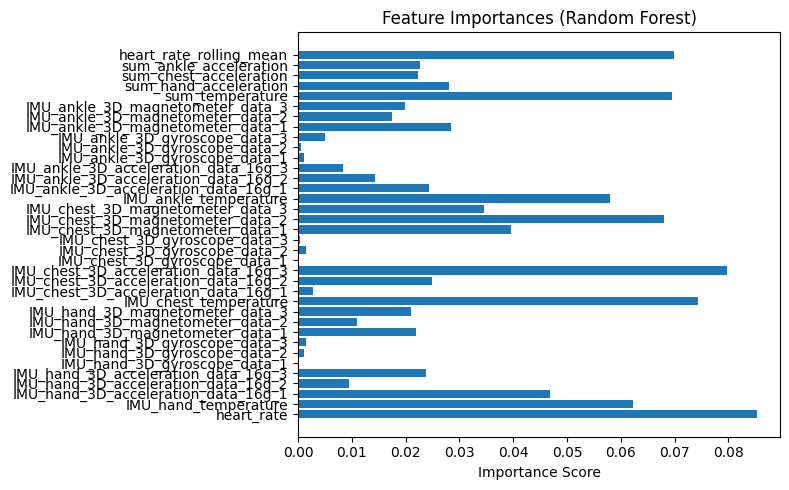

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample

X_train_sub, y_train_sub = X_train, y_train

# Кодирование меток
le = LabelEncoder().fit(all_classes)
y_train_enc = le.transform(y_train_sub)
y_test_enc = le.transform(y_test)

# Модель
model = RandomForestClassifier(
    n_estimators=300, 
    max_depth=8,
    random_state=42,
    n_jobs=-1
)

# Обучение
model.fit(X_train_sub, y_train_enc)

# Предсказания
y_pred_enc = model.predict(X_test)
y_pred = le.inverse_transform(y_pred_enc)

# Оценка
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

# Важность признаков
importances = model.feature_importances_
features = X_train.columns
plt.figure(figsize=(8, 5))
plt.barh(features, importances)
plt.xlabel("Importance Score")
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

***
#### Logistic Regression:
***

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.93      0.95     38470
           2       0.80      0.83      0.81     36952
           3       0.71      0.75      0.73     37840
           4       0.82      0.79      0.80     46005
           5       0.66      0.76      0.71     19130
           6       0.87      0.85      0.86     32676
           7       0.67      0.71      0.69     36920
           9       0.99      0.94      0.97     16727
          10       0.98      0.99      0.98     61940
          11       0.98      0.99      0.98     10898
          12       0.47      0.50      0.48     23427
          13       0.46      0.36      0.40     20979
          16       0.81      0.78      0.79     35031
          17       0.73      0.84      0.78     47625
          18       0.59      0.48      0.53     19926
          19       0.74      0.57      0.65     37393
          20       0.73      0.89     

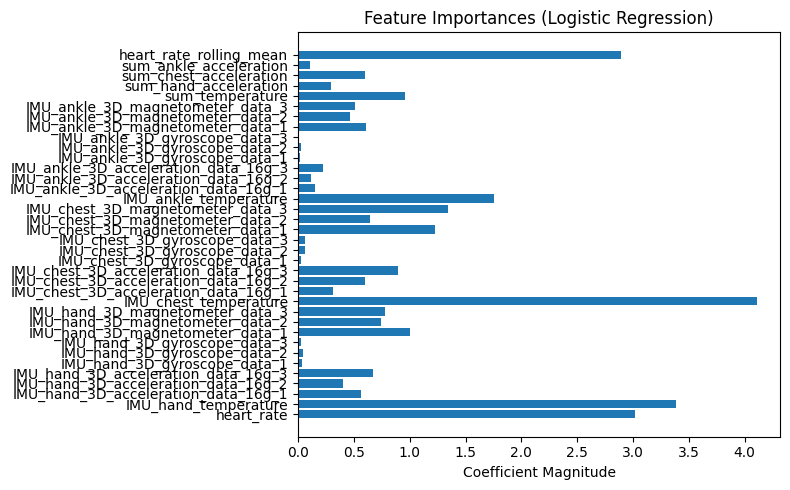

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.utils import resample

X_train_sub, y_train_sub = X_train, y_train

# Масштабирование
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_sub)
X_test_scaled = scaler.transform(X_test)

# Кодирование меток
le = LabelEncoder().fit(all_classes)
y_train_enc = le.transform(y_train_sub)
y_test_enc = le.transform(y_test)

# Модель
model = LogisticRegression(
    max_iter=300,
    random_state=42
)

# Обучение
model.fit(X_train_scaled, y_train_enc)

# Предсказания
y_pred_enc = model.predict(X_test_scaled)
y_pred = le.inverse_transform(y_pred_enc)

# Оценка
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

# Важность признаков
coefficients = np.abs(model.coef_).mean(axis=0)
features = X_train.columns
plt.figure(figsize=(8, 5))
plt.barh(features, coefficients)
plt.xlabel("Coefficient Magnitude")
plt.title("Feature Importances (Logistic Regression)")
plt.tight_layout()
plt.show()

***
#### CatBoost:
***

CatBoost Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.89      0.94     38470
           2       0.95      0.93      0.94     36952
           3       0.86      0.94      0.90     37840
           4       0.92      0.75      0.82     46005
           5       0.94      0.93      0.93     19130
           6       0.93      0.90      0.92     32676
           7       0.74      0.95      0.83     36920
           9       1.00      0.93      0.96     16727
          10       0.97      0.90      0.93     61940
          11       1.00      0.99      0.99     10898
          12       0.69      0.69      0.69     23427
          13       0.62      0.58      0.60     20979
          16       0.91      0.92      0.91     35031
          17       0.91      0.98      0.95     47625
          18       0.89      0.94      0.92     19926
          19       0.82      0.87      0.84     37393
          20       0.83      0.95      0.89      

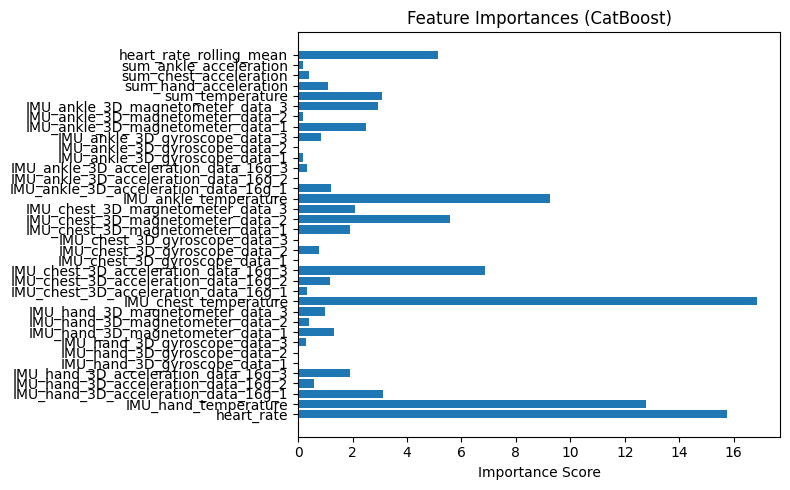

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier
from sklearn.utils import resample

X_train_sub, y_train_sub = X_train, y_train

# Кодирование меток
le = LabelEncoder().fit(all_classes)
y_train_enc = le.transform(y_train_sub)
y_test_enc = le.transform(y_test)

# Модель
model = CatBoostClassifier(
    iterations=100,  # Уменьшено
    depth=4,  # Уменьшено
    learning_rate=0.1,
    loss_function='MultiClass',
    verbose=False,
    random_seed=42
)

# Обучение
model.fit(X_train_sub, y_train_enc)

# Предсказания
y_pred_enc = model.predict(X_test).flatten().astype(int)
y_pred = le.inverse_transform(y_pred_enc)

# Оценка
print("CatBoost Classification Report:")
print(classification_report(y_test, y_pred))

# Важность признаков
importances = model.get_feature_importance()
features = X_train.columns
plt.figure(figsize=(8, 5))
plt.barh(features, importances)
plt.xlabel("Importance Score")
plt.title("Feature Importances (CatBoost)")
plt.tight_layout()
plt.show()

***
### XGBoost + HMM:
***

In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight

# Функция ordered_unique
def ordered_unique(x):
    """Return unique elements, maintaining order of appearance"""
    return np.unique(x)[np.argsort(np.unique(x, return_index=True)[1])]

# Реализация HMM
class HMM:
    def __init__(self, startprob=None, emissionprob=None, transmat=None, n_iter=100, random_state=None):
        self.startprob = startprob
        self.emissionprob = emissionprob
        self.transmat = transmat
        self.n_iter = n_iter
        self.random_state = random_state
        self.labels = None

    def __str__(self):
        return (
            "HMM Model:\n"
            f"{ {'startprob': self.startprob, 'emission': self.emissionprob, 'transition': self.transmat} }"
        )

    def fit(self, Y_pred, Y_true, groups=None):
        self.labels = np.sort(np.unique(Y_true))
        self.startprob = self.compute_probability(Y_true, self.labels, uniform=False)
        self.emissionprob = self.compute_emission_probability(Y_pred, Y_true, self.labels)
        self.transmat = self.compute_transition_probability(Y_true, self.labels, groups)

    def compute_probability(self, Y_true, labels=None, uniform=False):
        if labels is None:
            labels = np.sort(np.unique(Y_true))

        if uniform:
            probability = np.ones(self.labels(Y_true)) / len(Y_true)
        else:
            probability = np.mean(Y_true.reshape(-1, 1) == labels, axis=0)
        return probability

    def compute_emission_probability(self, Y_score, Y_true, labels=None):
        if labels is None:
            labels = np.sort(np.unique(Y_true))

        if Y_score.ndim == 1:
            Y_pred = np.vstack([
                (Y_score == labels).astype('float')[:, None]
            for label in labels])
        else:
            Y_pred = Y_score

        emission = np.vstack([
            np.mean(Y_pred[Y_true == label], axis=0) for label in labels
        ])
        return emission

    def compute_transition_probability(self, Y, labels=None, groups=None):
        if labels is None:
            labels = np.sort(np.unique(Y))

        def _compute_transition(Y):
            transition = np.vstack([
                np.sum(Y[1:][(Y == label)[:-1]].reshape(-1, 1) == labels, axis=0)
                for label in labels
            ])
            return transition

        if groups is None:
            transition = _compute_transition(Y)
        else:
            transition = sum((
                _compute_transition(Y[groups == g])
                for g in ordered_unique(groups)
            ))

        # Laplace smoothing
        transition = transition + 1
        transition = transition / np.sum(transition, axis=1).reshape(-1, 1)
        return transition

    def predict(self, Y, groups=None):
        params = {
            'prior': self.startprob,
            'emission': self.emissionprob,
            'transition': self.transmat,
            'labels': self.labels,
        }

        if groups is None:
            Y_vit, _ = self._viterbi(Y, params)
        else:
            Y_vit = np.concatenate([
                self._viterbi(Y[groups == g], params)[0]
                for g in ordered_unique(groups)
            ])
        return Y_vit

    def predict_probability(self, Y, groups=None):
        params = {
            'prior': self.startprob,
            'emission': self.emissionprob,
            'transition': self.transmat,
            'labels': self.labels,
        }
        if groups is None:
            _, probs = self._viterbi(Y, params, True)
        else:
            probs = np.concatenate([
                self._viterbi(Y[groups == g], params, True)[1]
                for g in ordered_unique(groups)
            ])
        return probs

    def optimise(self, **kwargs):
        return

    def _viterbi(self, Y, hmm_params, return_probs=False):
        if len(Y) == 0:
            return np.empty_like(Y), np.array([])

        def log(x):
            SMALL_NUMBER = 1e-16
            return np.log(x + SMALL_NUMBER)

        prior = hmm_params['prior']
        emission = hmm_params['emission']
        transition = hmm_params['transition']
        labels = hmm_params['labels']

        nobs = len(Y)
        nlabels = len(labels)

        if Y.ndim == 1:
            Y = np.where(Y.reshape(-1, 1) == labels)[1]
        else:
            Y = Y

        probs = np.zeros((nobs, nlabels))
        probs[0, :] = log(prior) + log(emission[:, Y[0] if Y.ndim == 1 else np.argmax(Y[0])])
        for j in range(1, nobs):
            for i in range(nlabels):
                probs[j, i] = np.max(
                    log(emission[i, Y[j] if Y.ndim == 1 else np.argmax(Y[j])]) +
                    log(transition[:, i]) +
                    probs[j - 1, :])
        viterbi_path = np.zeros_like(Y, dtype=int) if Y.ndim == 1 else np.zeros(len(Y), dtype=int)
        viterbi_path[-1] = np.argmax(probs[-1, :])
        for j in reversed(range(nobs - 1)):
            viterbi_path[j] = np.argmax(
                log(transition[:, viterbi_path[j + 1]]) +
                probs[j, :])

        viterbi_path = labels[viterbi_path]

        if return_probs:
            return viterbi_path, np.exp(probs)
        return viterbi_path, None

# Кодирование меток
le = LabelEncoder().fit(np.unique(y_train))
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

# Вычисление весов классов
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_enc), y=y_train_enc)
sample_weights = np.array([class_weights[cls] for cls in y_train_enc])

# Пайплайн XGBoost
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', XGBClassifier(
        objective='multi:softprob',
        n_estimators=300,  # Увеличено для полной выборки
        learning_rate=0.05,
        max_depth=10,
        random_state=42
    ))
])

# Обучение на полной выборке
pipeline.fit(X_train, y_train_enc, classifier__sample_weight=sample_weights)
y_pred_enc = pipeline.predict(X_test)
y_pred = le.inverse_transform(y_pred_enc)
# Сглаживание вероятностей
epsilon = 1e-5
y_train_proba = pipeline.predict_proba(X_train) * (1 - len(np.unique(y_train_enc)) * epsilon) + epsilon
y_pred_proba = pipeline.predict_proba(X_test) * (1 - len(np.unique(y_train_enc)) * epsilon) + epsilon

# HMM для сглаживания предсказаний
hmm_model = HMM(n_iter=100, random_state=42)
hmm_model.fit(y_train_proba, y_train_enc)

# Корректировка предсказаний
y_pred_hmm = hmm_model.predict(y_pred_proba)
y_pred_hmm = le.inverse_transform(y_pred_hmm)

# Оценка
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))
print("XGBoost + HMM Classification Report:")
print(classification_report(y_test, y_pred_hmm, zero_division=0))

# Сохранение метрик
metrics = {
    'XGBoost': {
        'accuracy': accuracy_score(y_test, y_pred),
        'f1_macro': f1_score(y_test, y_pred, average='macro')
    },
    'XGBoost_HMM': {
        'accuracy': accuracy_score(y_test, y_pred_hmm),
        'f1_macro': f1_score(y_test, y_pred_hmm, average='macro')
    }
}

# Вывод матриц HMM для отладки
print(hmm_model)

XGBoost Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.98      0.99     38470
           2       0.99      0.96      0.97     36952
           3       0.95      0.89      0.92     37840
           4       0.99      0.80      0.88     46005
           5       0.97      0.88      0.92     19130
           6       0.95      0.87      0.91     32676
           7       0.79      0.97      0.87     36920
           9       1.00      0.98      0.99     16727
          10       1.00      0.87      0.93     61940
          11       1.00      1.00      1.00     10898
          12       0.91      0.75      0.82     23427
          13       0.72      0.91      0.80     20979
          16       0.75      0.99      0.86     35031
          17       0.81      0.83      0.82     47625
          18       0.90      1.00      0.95     19926
          19       0.90      0.88      0.89     37393
          20       0.94      0.86      0.90      9

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight

def ordered_unique(x):
    """ Return unique elements, maintaining order of appearance """
    return x[np.sort(np.unique(x, return_index=True)[1])]

class HMM:
    def __init__(self, startprob=None, emissionprob=None, transmat=None, n_iter=100, random_state=None):
        self.startprob = startprob
        self.emissionprob = emissionprob
        self.transmat = transmat
        self.n_iter = n_iter
        self.random_state = random_state
        self.labels = None

    def __str__(self):
        return (
            "HMM Model:\n"
            f"{ {'prior': self.startprob, 'emission': self.emissionprob, 'transition': self.transmat} }"
        )

    def fit(self, Y_pred, Y_true, groups=None):
        self.labels = np.unique(Y_true)
        self.startprob = self.compute_prior(Y_true, self.labels, uniform=False)
        self.emissionprob = self.compute_emission(Y_pred, Y_true, self.labels)
        self.transmat = self.compute_transition(Y_true, self.labels, groups)

    def predict(self, Y, groups=None):
        params = {
            'prior': self.startprob,
            'emission': self.emissionprob,
            'transition': self.transmat,
            'labels': self.labels,
        }
        if groups is None:
            Y_vit, _ = self._viterbi(np.argmax(Y, axis=1), params)
        else:
            Y_vit = np.concatenate([
                self._viterbi(np.argmax(Y[groups == g], axis=1), params)[0]
                for g in ordered_unique(groups)
            ])
        return Y_vit

    def predict_proba(self, Y, groups=None):
        params = {
            'prior': self.startprob,
            'emission': self.emissionprob,
            'transition': self.transmat,
            'labels': self.labels,
        }
        if groups is None:
            _, probs = self._viterbi(np.argmax(Y, axis=1), params, True)
        else:
            probs = np.concatenate([
                self._viterbi(np.argmax(Y[groups == g], axis=1), params, True)[1]
                for g in ordered_unique(groups)
            ])
        return probs

    def optimise(self, **kwargs):
        return

    @staticmethod
    def compute_transition(Y, labels=None, groups=None):
        if labels is None:
            labels = np.unique(Y)
        def _compute_transition(Y):
            transition = np.vstack([
                np.sum(Y[1:][(Y == label)[:-1]].reshape(-1, 1) == labels, axis=0)
                for label in labels
            ])
            return transition
        if groups is None:
            transition = _compute_transition(Y)
        else:
            transition = sum((
                _compute_transition(Y[groups == g])
                for g in ordered_unique(groups)
            ))
        transition = transition + 1  # Laplace smoothing
        transition = transition / np.sum(transition, axis=1).reshape(-1, 1)
        return transition

    @staticmethod
    def compute_emission(Y_score, Y_true, labels=None):
        if labels is None:
            labels = np.unique(Y_true)
        Y_pred = np.argmax(Y_score, axis=1)  # Бинарные предсказания
        emission = np.zeros((len(labels), len(labels)))
        for i, true_label in enumerate(labels):
            mask = (Y_true == true_label)
            if np.sum(mask) > 0:
                emission[i] = np.bincount(Y_pred[mask], minlength=len(labels)) / np.sum(mask)
        return emission

    @staticmethod
    def compute_prior(Y_true, labels=None, uniform=True):
        if labels is None:
            labels = np.unique(Y_true)
        if uniform:
            prior = np.ones(len(labels)) / len(labels)
        else:
            prior = np.mean(Y_true.reshape(-1, 1) == labels, axis=0)
        return prior

    def _viterbi(self, Y, hmm_params, return_probs=False):
        if len(Y) == 0:
            return np.empty_like(Y), np.array([])
        def log(x):
            SMALL_NUMBER = 1e-16
            return np.log(x + SMALL_NUMBER)
        prior = hmm_params['prior']
        emission = hmm_params['emission']
        transition = hmm_params['transition']
        labels = hmm_params['labels']
        nobs = len(Y)
        nlabels = len(labels)
        probs = np.zeros((nobs, nlabels))
        probs[0, :] = log(prior) + log(emission[:, Y[0]])
        for j in range(1, nobs):
            for i in range(nlabels):
                probs[j, i] = np.max(
                    log(emission[i, Y[j]]) +
                    log(transition[:, i]) +
                    probs[j - 1, :])
        viterbi_path = np.zeros(nobs, dtype=int)
        viterbi_path[-1] = np.argmax(probs[-1, :])
        for j in reversed(range(nobs - 1)):
            viterbi_path[j] = np.argmax(
                log(transition[:, viterbi_path[j + 1]]) +
                probs[j, :])
        viterbi_path = labels[viterbi_path]
        if return_probs:
            return viterbi_path, np.exp(probs)
        return viterbi_path, None

# Используем полный набор данных
X_train_sub = X_train.copy()
y_train_sub = y_train.copy()

# Проверка наличия всех классов (опционально, так как используем полный набор)
all_classes = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 24]
missing_classes = set(all_classes) - set(np.unique(y_train_sub))
if missing_classes:
    print(f"Warning: Missing classes in training subset: {missing_classes}")
    for cls in missing_classes:
        cls_indices = np.where(y_train == cls)[0]
        if len(cls_indices) > 0:
            first_idx = cls_indices[0]
            X_train_sub = pd.concat([X_train_sub, X_train.iloc[[first_idx]]], ignore_index=True)
            y_train_sub = pd.concat([y_train_sub, y_train.iloc[[first_idx]]], ignore_index=True)

# Кодирование меток
train_classes = np.unique(y_train_sub)
le = LabelEncoder().fit(train_classes)
y_train_enc = le.transform(y_train_sub)
y_test_enc = le.transform(y_test)

# Вычисление весов классов
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_enc), y=y_train_enc)
sample_weights = np.array([class_weights[cls] for cls in y_train_enc])

# Пайплайн XGBoost
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', XGBClassifier(
        objective='multi:softprob',
        n_estimators=300,
        learning_rate=0.05,
        max_depth=10,
        random_state=42
    ))
])

# Обучение с весами классов
pipeline.fit(X_train_sub, y_train_enc, classifier__sample_weight=sample_weights)
y_pred_enc = pipeline.predict(X_test)
y_pred = le.inverse_transform(y_pred_enc)

# Сглаживание вероятностей
epsilon = 1e-5
y_train_proba = pipeline.predict_proba(X_train_sub) * (1 - len(np.unique(y_train_enc)) * epsilon) + epsilon
y_pred_proba = pipeline.predict_proba(X_test) * (1 - len(np.unique(y_train_enc)) * epsilon) + epsilon

# HMM для сглаживания предсказаний
hmm_model = HMM(n_iter=100, random_state=42)
hmm_model.fit(y_train_proba, y_train_enc)

# Корректировка предсказаний с учётом субъектов
groups_test = test_df['subject_id'].values  # Предполагаем, что есть subject_id
y_pred_hmm = hmm_model.predict(y_pred_proba, groups=groups_test)
y_pred_hmm = le.inverse_transform(y_pred_hmm)

# Оценка
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))
print("XGBoost + HMM Classification Report:")
print(classification_report(y_test, y_pred_hmm, zero_division=0))

# Сохранение метрик
metrics = {
    'XGBoost': {
        'accuracy': accuracy_score(y_test, y_pred),
        'f1_macro': f1_score(y_test, y_pred, average='macro')
    },
    'XGBoost_HMM': {
        'accuracy': accuracy_score(y_test, y_pred_hmm),
        'f1_macro': f1_score(y_test, y_pred_hmm, average='macro')
    }
}

# Вывод матриц HMM для отладки
print(hmm_model)

In [34]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

class HMM:
    def __init__(self, n_iter=100, random_state=None):
        self.n_iter = n_iter
        self.random_state = random_state
        self.labels = None
        self.startprob = None    # априорные вероятности состояний
        self.transmat = None     # матрица переходных вероятностей

    def __str__(self):
        return (
            "HMM Model:\n"
            f"{ {'startprob': self.startprob, 'transition': self.transmat} }"
        )

    def fit(self, y_pred_proba, y_true, groups=None):
        """
        y_pred_proba: numpy array shape (n_samples, n_classes) — предсказанные XGB вероятности на train
        y_true:       numpy array shape (n_samples,)        — истинные целевые метки (int кодированные)
        groups:       numpy array shape (n_samples,) или None — если нужно разбить на последовательности (опционально)
        """
        self.labels = np.sort(np.unique(y_true))
        n_states = len(self.labels)

        # 1) startprob: просто частота каждой метки на позиции 0 каждой группы (если groups задан)
        if groups is None:
            # если групп нет, то считаем, что вся последовательность одна: стартовая — первая точка
            first_labels = y_true[0:1]
        else:
            # выбираем первые элементы каждой группы (ordered)
            unique_groups = np.unique(groups)
            first_labels = np.array([y_true[groups == g][0] for g in unique_groups])

        # считаем частоту старта
        start_counts = np.zeros(n_states, dtype=float)
        for lbl in first_labels:
            idx = np.where(self.labels == lbl)[0][0]
            start_counts[idx] += 1
        # Лапласово сглаживание (чтобы не было нулей и легче брали лог)
        start_counts += 1.0
        self.startprob = start_counts / np.sum(start_counts)

        # 2) transition matrix
        # построим переходы внутри каждой группы (или целиком, если groups=None)
        def compute_trans(y_seq):
            # y_seq — массив меток одной «последовательности»
            T = np.zeros((n_states, n_states), dtype=float)
            for t in range(len(y_seq) - 1):
                i = np.where(self.labels == y_seq[t])[0][0]
                j = np.where(self.labels == y_seq[t + 1])[0][0]
                T[i, j] += 1
            return T

        if groups is None:
            # считаем переходы по всему y_true
            trans_counts = compute_trans(y_true)
        else:
            trans_counts = np.zeros((n_states, n_states), dtype=float)
            for g in np.unique(groups):
                seq = y_true[groups == g]
                if len(seq) > 1:
                    trans_counts += compute_trans(seq)

        # Лапласово сглаживание
        trans_counts += 1.0
        self.transmat = trans_counts / trans_counts.sum(axis=1, keepdims=True)

        # Эмиссию явно не храним: будем напрямую брать значения из y_pred_proba
        # т.е. считаем, что P(observation=t_prob_vector | hidden_state=i) = y_pred_proba[t, i]
        return self

    def _viterbi(self, y_prob_seq):
        """
        y_prob_seq: numpy array shape (L, n_states) — вектор вероятностей предсказаний XGB на L длину
        Возвращает: маску скрытых состояний той же длины (L,)
        """
        SMALL = 1e-16
        log_start = np.log(self.startprob + SMALL)
        log_trans = np.log(self.transmat + SMALL)

        n_obs = y_prob_seq.shape[0]
        n_states = y_prob_seq.shape[1]

        # матрица для динамического программирования: dp[t, i] = максимальная лог-вероятность
        # того, что скрытое состояние в момент t = i, и что первые t наблюдений сгенерированы
        dp = np.zeros((n_obs, n_states), dtype=float)
        # «указатели» для восстановления пути
        ptr = np.zeros((n_obs, n_states), dtype=int)

        # инициализация t=0
        dp[0] = log_start + np.log(y_prob_seq[0] + SMALL)

        # основная «шаг» рекурсии
        for t in range(1, n_obs):
            log_emiss_t = np.log(y_prob_seq[t] + SMALL)  # shape = (n_states,)
            for j in range(n_states):
                # ищем максимум по предпоследнему состоянию i
                seq_probs = dp[t - 1] + log_trans[:, j] + log_emiss_t[j]
                ptr[t, j] = np.argmax(seq_probs)
                dp[t, j] = np.max(seq_probs)

        # восстановление пути
        states = np.zeros(n_obs, dtype=int)
        states[-1] = np.argmax(dp[-1])
        for t in range(n_obs - 2, -1, -1):
            states[t] = ptr[t + 1, states[t + 1]]

        # переведём индексы внутри [0..n_states−1] обратно в реальные метки
        decoded = np.array([self.labels[s] for s in states], dtype=int)
        return decoded

    def predict(self, y_pred_proba, groups=None):
        """
        y_pred_proba: numpy array shape (n_samples, n_states) — предсказанные вероятности XGB
        groups:      numpy array shape (n_samples,) или None — разбивка на независимые цепочки
        """
        if groups is None:
            return self._viterbi(y_pred_proba)
        else:
            out = np.zeros_like(groups, dtype=int)
            for g in np.unique(groups):
                mask = (groups == g)
                seq_probs = y_pred_proba[mask]
                out[mask] = self._viterbi(seq_probs)
            return out

    def predict_proba(self, y_pred_proba, groups=None):
        """
        Опционально: если нужно получить «скрытые вероятности» на каждом шагу, можно сделать forward–backward.
        Здесь пока не реализовано, но метод оставлен «заглушкой».
        """
        raise NotImplementedError("predict_proba не реализован; используйте только predict()")


In [35]:
# --- 1) Кодируем метки и обучаем XGBoost (как у вас было) ---
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight

# Допустим, у вас уже есть y_train, y_test (строки), X_train, X_test
le = LabelEncoder().fit(np.unique(y_train))
y_train_enc = le.transform(y_train)
y_test_enc  = le.transform(y_test)

# Считаем веса классов для XGBoost
class_weights = compute_class_weight('balanced',
                                     classes=np.unique(y_train_enc),
                                     y=y_train_enc)
sample_weights = np.array([class_weights[cls] for cls in y_train_enc])

# Собираем Pipeline
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('xgb', XGBClassifier(
        objective='multi:softprob',
        n_estimators=300,
        learning_rate=0.05,
        max_depth=10,
        random_state=42
    ))
])

# Обучаем XGBoost (передаём sample_weight через двойное подчёркивание)
pipeline.fit(X_train, y_train_enc, xgb__sample_weight=sample_weights)

# Получаем «сырые» предсказанные вероятности
epsilon = 1e-5
n_classes = len(np.unique(y_train_enc))
# Добавляем немного эпсилон, чтобы нигде не было нулевых вероятностей
y_train_proba = pipeline.predict_proba(X_train)
y_train_proba = y_train_proba * (1 - n_classes * epsilon) + epsilon

y_test_proba = pipeline.predict_proba(X_test)
y_test_proba = y_test_proba * (1 - n_classes * epsilon) + epsilon

# Получаем «жёсткие» предсказания просто для сравнения
y_pred_enc = pipeline.predict(X_test)
y_pred = le.inverse_transform(y_pred_enc)

# --- 2) Обучаем новый HMM и «сглаживаем» предсказания ---
hmm_model = HMM(n_iter=100, random_state=42)
hmm_model.fit(y_train_proba, y_train_enc)  # groups=None, если всё — одна последовательность

# Корректируем предсказания на тесте
y_pred_hmm_enc = hmm_model.predict(y_test_proba)
y_pred_hmm     = le.inverse_transform(y_pred_hmm_enc)

# --- 3) Оцениваем результаты ---
print("XGBoost Classification Report без HMM:")
print(classification_report(y_test, y_pred, zero_division=0))

print("XGBoost + HMM Classification Report:")
print(classification_report(y_test, y_pred_hmm, zero_division=0))

print("Метрики сравнения:")
metrics = {
    'XGBoost': {
        'accuracy': accuracy_score(y_test, y_pred),
        'f1_macro': f1_score(y_test, y_pred, average='macro')
    },
    'XGBoost+HMM': {
        'accuracy': accuracy_score(y_test, y_pred_hmm),
        'f1_macro': f1_score(y_test, y_pred_hmm, average='macro')
    }
}
print(metrics)

# Для отладки выведем модель HMM:
print(hmm_model)


XGBoost Classification Report без HMM:
              precision    recall  f1-score   support

           1       1.00      0.98      0.99     38470
           2       0.99      0.96      0.97     36952
           3       0.95      0.89      0.92     37840
           4       0.99      0.80      0.88     46005
           5       0.97      0.88      0.92     19130
           6       0.95      0.87      0.91     32676
           7       0.79      0.97      0.87     36920
           9       1.00      0.98      0.99     16727
          10       1.00      0.87      0.93     61940
          11       1.00      1.00      1.00     10898
          12       0.91      0.75      0.82     23427
          13       0.72      0.91      0.80     20979
          16       0.75      0.99      0.86     35031
          17       0.81      0.83      0.82     47625
          18       0.90      1.00      0.95     19926
          19       0.90      0.88      0.89     37393
          20       0.94      0.86      0.9

***
### Создлание сравнительной таблице моделей рассмотренных выше + дополнительно более простые модели (DT, Bagging) и voting classifier из XBG, CatBoost, RFClassifier
***

In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import (
    BaggingClassifier, AdaBoostClassifier,
    RandomForestClassifier, VotingClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import pandas as pd
import numpy as np

# Подготовка данных
X = X_train
y = y_train

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

def eval_classifier(clf):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=43)
    results = {}
    for metric_name, scorer in scoring.items():
        scores = cross_val_score(clf, X, y, scoring=scorer, cv=cv, n_jobs=-1, error_score='raise')
        results[metric_name] = (np.mean(scores), np.std(scores))
    return results

metrics = ['accuracy', 'precision', 'recall', 'f1']
methods = ["W/o ensembling", 'Bagging', "Bagging_with_mf", 'AdaBoost', 'XGBoost', 'CatBoost', 'RandomForest', 'Voting']
models = ['DTC', 'LR']

results = {
    metric: pd.DataFrame(0.0, columns=methods, index=models + ['RF', 'CatBoost', 'XGB_weighted', 'Voting'])
    for metric in metrics
}

base_models = {
    'DTC': DecisionTreeClassifier(),
    'LR': LogisticRegression(max_iter=1000)
}

# --- Базовые модели ---
for name, model in base_models.items():
    scores = eval_classifier(model)
    for metric in metrics:
        results[metric].loc[name, 'W/o ensembling'] = scores[metric][0]

# --- Bagging ---
for name, model in base_models.items():
    bagging = BaggingClassifier(model, n_estimators=10, bootstrap=True)
    scores = eval_classifier(bagging)
    for metric in metrics:
        results[metric].loc[name, 'Bagging'] = scores[metric][0]

# --- Bagging с ограничением признаков ---
for name, model in base_models.items():
    bagging_mf = BaggingClassifier(model, n_estimators=10, max_features=0.8)
    scores = eval_classifier(bagging_mf)
    for metric in metrics:
        results[metric].loc[name, 'Bagging_with_mf'] = scores[metric][0]

# --- AdaBoost ---
for name, model in base_models.items():
    adaboost = AdaBoostClassifier(model, n_estimators=50)
    scores = eval_classifier(adaboost)
    for metric in metrics:
        results[metric].loc[name, 'AdaBoost'] = scores[metric][0]

# --- XGBoost ---
for name, model in base_models.items():
    if name == 'LR':
        xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', booster='gblinear', n_estimators=50)
    else:
        xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', booster='gbtree', n_estimators=50)
    try:
        model.fit(X, y)
        xgb.fit(X, y, xgb_model=model)
        scores = eval_classifier(xgb)
    except:
        scores = eval_classifier(xgb)
    for metric in metrics:
        results[metric].loc[name, 'XGBoost'] = scores[metric][0]

# --- CatBoost (одиночный) ---
catboost = CatBoostClassifier(
    iterations=100, depth=4, learning_rate=0.1,
    loss_function='MultiClass', verbose=False, random_seed=42
)
scores = eval_classifier(catboost)
for metric in metrics:
    results[metric].loc['CatBoost', 'CatBoost'] = scores[metric][0]

# --- RandomForest ---
rf = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42, n_jobs=-1)
scores = eval_classifier(rf)
for metric in metrics:
    results[metric].loc['RF', 'RandomForest'] = scores[metric][0]

# --- XGBoost с весами классов ---
le_weighted = LabelEncoder().fit(np.unique(y))
y_enc_weighted = le_weighted.transform(y)
class_weights = np.bincount(y_enc_weighted)
class_weights = np.sum(class_weights) / (len(class_weights) * class_weights)
sample_weights = np.array([class_weights[cls] for cls in y_enc_weighted])

pipeline_weighted = Pipeline([
    ('scaler', RobustScaler()),
    ('xgb', XGBClassifier(objective='multi:softprob', n_estimators=300, learning_rate=0.05, max_depth=10, random_state=42))
])
pipeline_weighted.fit(X, y_enc_weighted, xgb__sample_weight=sample_weights)
scores = eval_classifier(pipeline_weighted)
for metric in metrics:
    results[metric].loc['XGB_weighted', 'XGBoost'] = scores[metric][0]

# --- VotingClassifier на основе лучших моделей ---
voting = VotingClassifier(estimators=[
    ('rf', rf),
    ('cat', catboost),
    ('xgb', XGBClassifier(objective='multi:softprob', n_estimators=300, learning_rate=0.1, max_depth=10, random_state=42))
], voting='soft', n_jobs=-1)
scores = eval_classifier(voting)
for metric in metrics:
    results[metric].loc['Voting', 'Voting'] = scores[metric][0]

# --- Финальный вывод ---
print("\n=== Сводные результаты ===")
for metric in metrics:
    print(f"\nМетрика: {metric}")
    display(results[metric])
